## Loan Approval Prediction

In [3]:
## import the pandas and numpy library
import pandas as pd
import numpy as np

In [4]:
## Import and read the first five records of the dataset
data_set = pd.read_csv("LoanDataset.csv")
data_set.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
## check the information about dataset

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
## check the value counts of the target variable

In [8]:
data_set['loan_status'].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

In [9]:
## Get the summary statistics of the dataset

In [10]:
data_set.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [11]:
## split the whole dataset into the training and testing set

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_set, test_size=0.2, random_state=42)
train_set.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
14337,14337,36,50000,RENT,0.0,HOMEIMPROVEMENT,C,7200,13.85,0.14,Y,15,0
17117,17117,27,43200,RENT,3.0,DEBTCONSOLIDATION,C,5000,11.66,0.12,Y,9,0
32590,32590,25,70000,MORTGAGE,0.0,EDUCATION,A,8000,7.88,0.11,N,3,0
55811,55811,39,75000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,15000,6.54,0.20,N,11,0
40120,40120,22,45600,RENT,5.0,MEDICAL,A,4000,7.66,0.09,N,2,0


In [13]:
test_set.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
4657,4657,23,40000,RENT,0.0,MEDICAL,A,3700,8.00,0.09,N,4,0
56440,56440,25,60000,MORTGAGE,9.0,HOMEIMPROVEMENT,A,5000,8.59,0.08,N,4,0
42117,42117,32,66300,RENT,0.0,MEDICAL,B,20000,12.53,0.26,N,6,1
10849,10849,22,30000,RENT,0.0,DEBTCONSOLIDATION,B,5000,10.59,0.17,N,2,0
39395,39395,27,60000,RENT,1.0,MEDICAL,B,7000,12.21,0.12,N,10,0


## Explotary Data Analysis (EDA) for training dataset

In [21]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46916 entries, 14337 to 56422
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          46916 non-null  int64  
 1   person_age                  46916 non-null  int64  
 2   person_income               46916 non-null  int64  
 3   person_home_ownership       46916 non-null  object 
 4   person_emp_length           46916 non-null  float64
 5   loan_intent                 46916 non-null  object 
 6   loan_grade                  46916 non-null  object 
 7   loan_amnt                   46916 non-null  int64  
 8   loan_int_rate               46916 non-null  float64
 9   loan_percent_income         46916 non-null  float64
 10  cb_person_default_on_file   46916 non-null  object 
 11  cb_person_cred_hist_length  46916 non-null  int64  
 12  loan_status                 46916 non-null  int64  
dtypes: float64(3), int64(6), object(

In [23]:
train_set['person_home_ownership'].value_counts()

person_home_ownership
RENT        24475
MORTGAGE    19857
OWN          2515
OTHER          69
Name: count, dtype: int64

In [24]:
train_set['loan_intent'].value_counts()

loan_intent
EDUCATION            9794
MEDICAL              8755
PERSONAL             8024
VENTURE              7945
DEBTCONSOLIDATION    7340
HOMEIMPROVEMENT      5058
Name: count, dtype: int64

In [25]:
train_set['loan_grade'].value_counts()

loan_grade
A    16769
B    16293
C     8859
D     4019
E      827
F      123
G       26
Name: count, dtype: int64

In [26]:
train_set['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    39900
Y     7016
Name: count, dtype: int64

In [36]:
## Data Preprcoessing

In [27]:
## when we consider the training set you can see categorical text oriented variables are there. So the, when we give that kind of features for model training,
## we have to convert into numeric values

In [34]:
train_set_new=train_set.replace({'person_home_ownership' :{'RENT':0, 'MORTGAGE':2, 'OWN':3,'OTHER':4}, 
                   'loan_intent':{'EDUCATION':1, 'MEDICAL':2,'PERSONAL':3, 'VENTURE':4,'DEBTCONSOLIDATION':5, 'HOMEIMPROVEMENT':6},
                   'loan_grade':{'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}, 'cb_person_default_on_file':{'N':0,'Y':1}})
train_set_new.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
14337,14337,36,50000,0,0.0,6,3,7200,13.85,0.14,1,15,0
17117,17117,27,43200,0,3.0,5,3,5000,11.66,0.12,1,9,0
32590,32590,25,70000,2,0.0,1,1,8000,7.88,0.11,0,3,0
55811,55811,39,75000,2,2.0,5,1,15000,6.54,0.20,0,11,0
40120,40120,22,45600,0,5.0,2,1,4000,7.66,0.09,0,2,0


In [19]:
## Plot the training dataset based on loan_status  using scatterplots

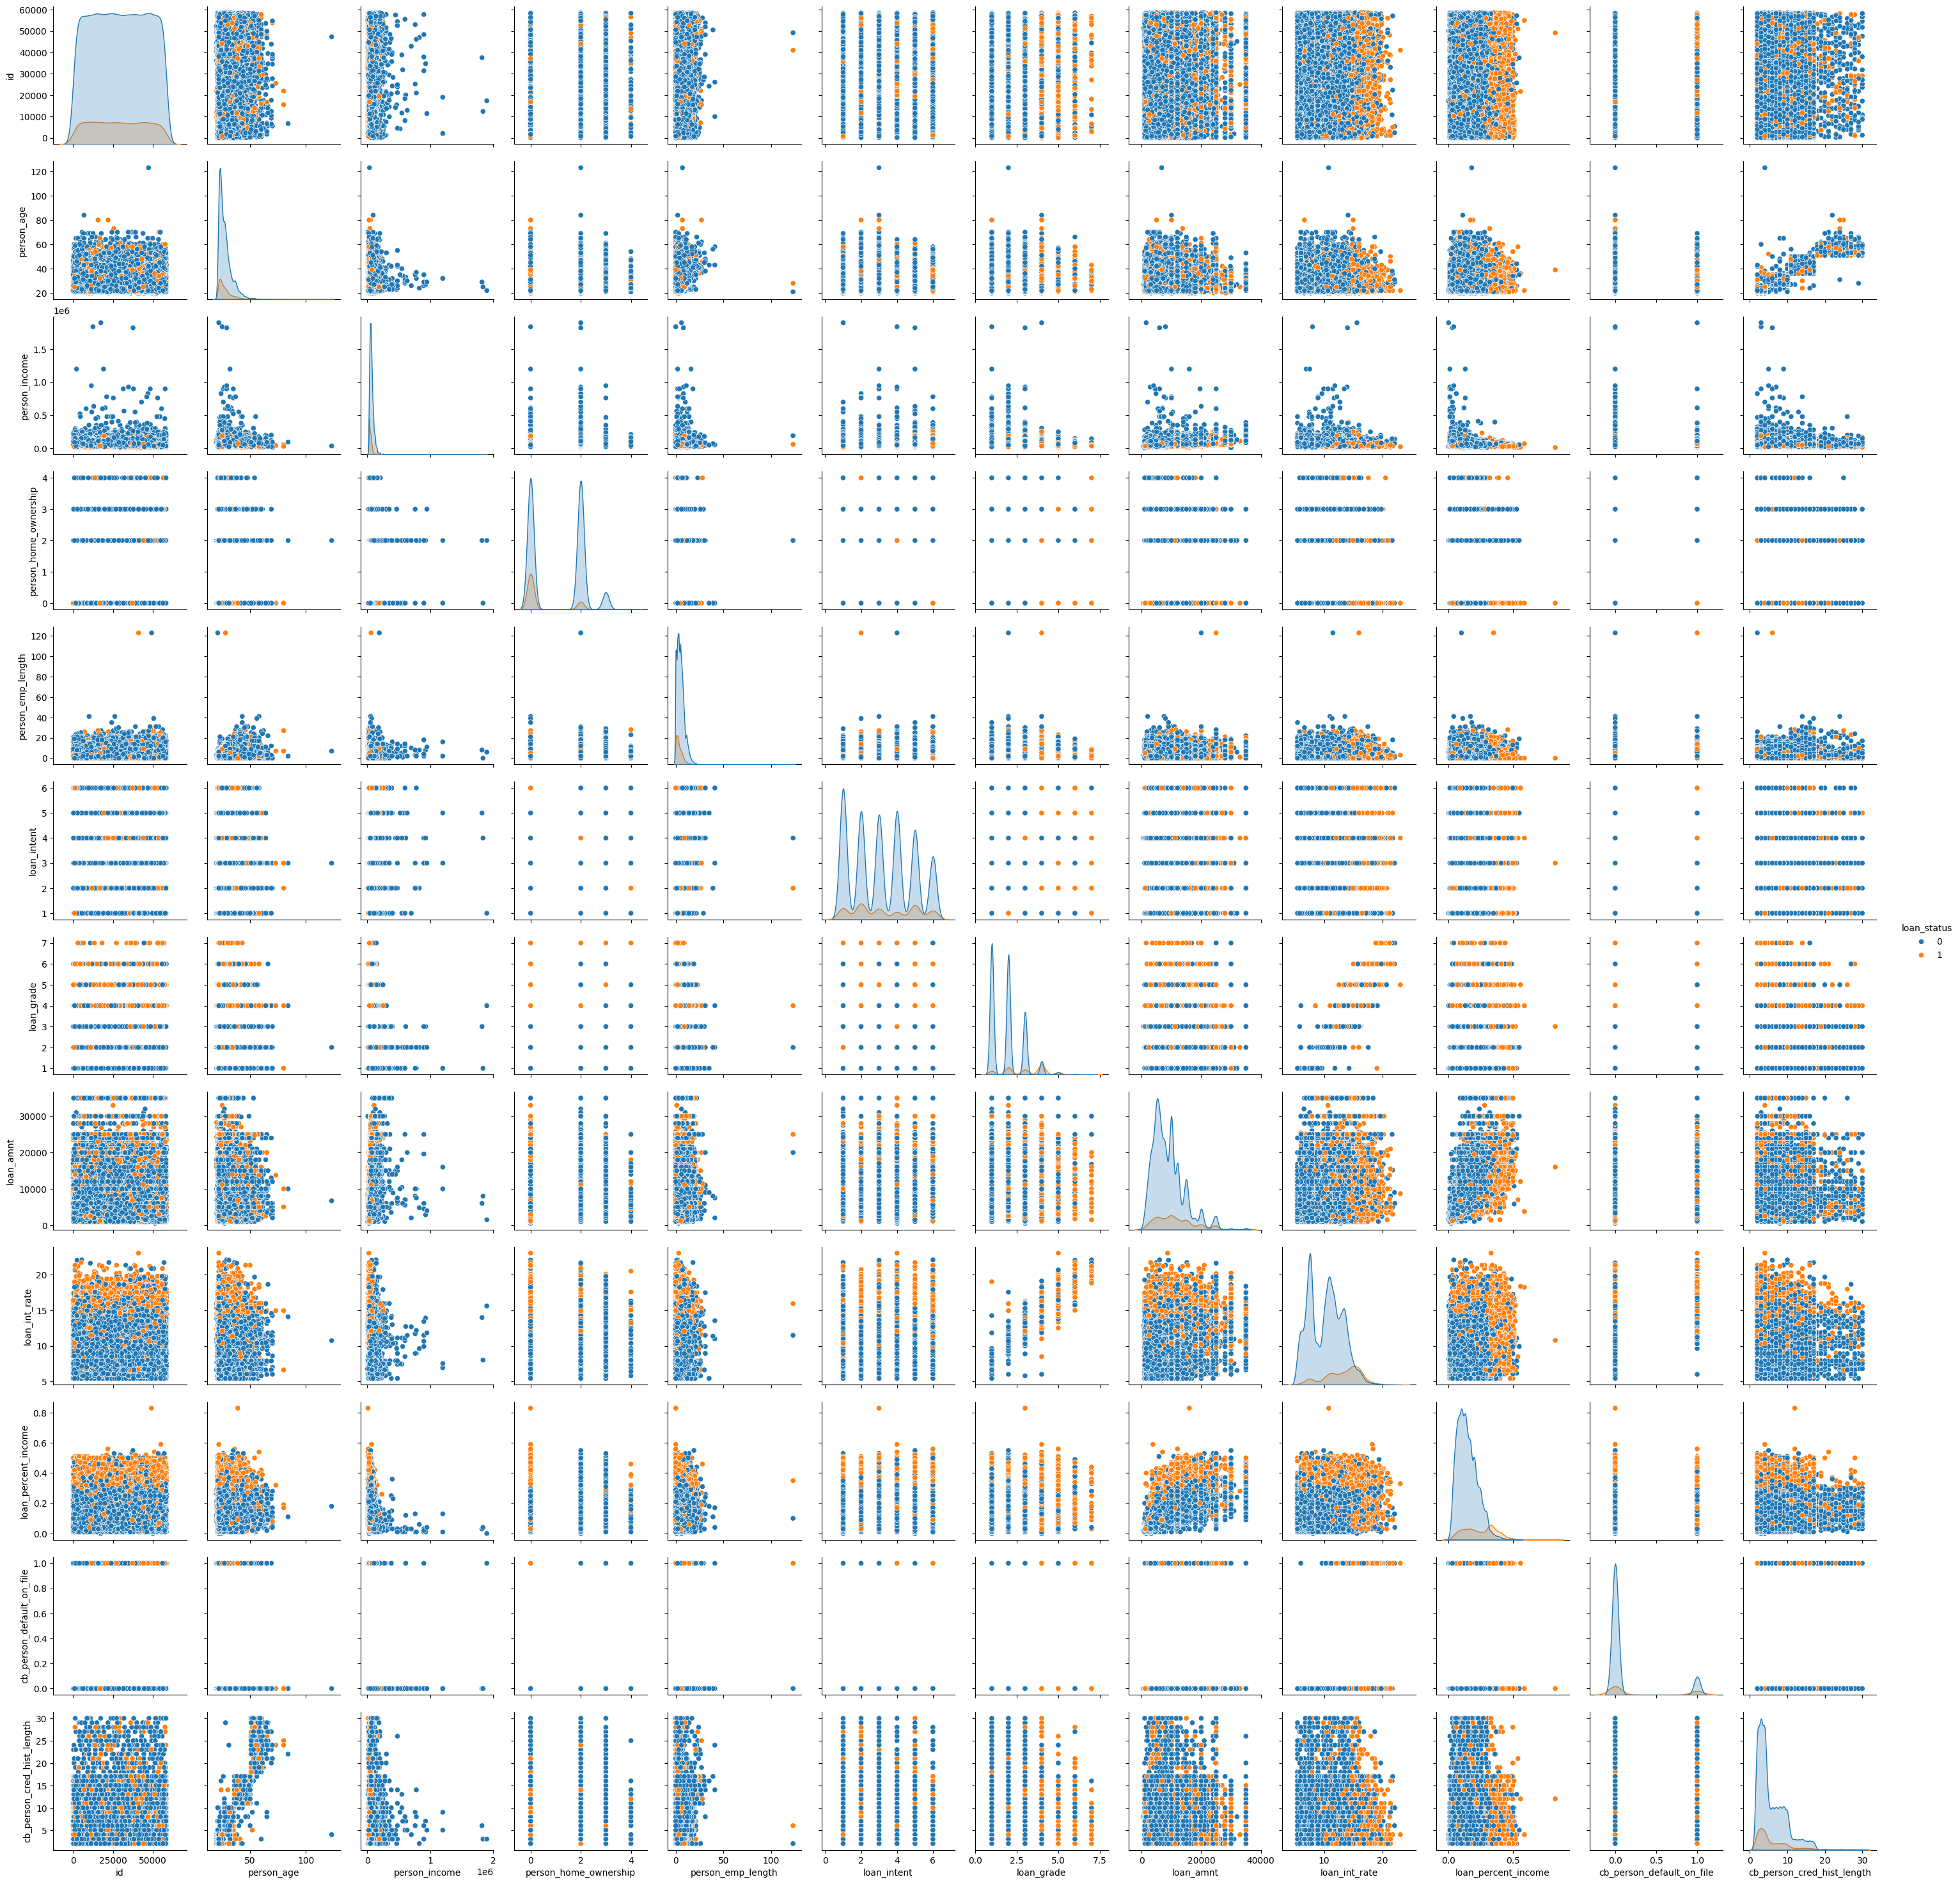

In [35]:
import seaborn as sns

sns.pairplot(train_set_new, hue="loan_status")